In [1]:
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()
print(list(breast_cancer))
print('\n* Description: ',breast_cancer.DESCR)
print('\n* Features: ',breast_cancer.feature_names)
print('\n* Data: ',breast_cancer.data)
print('\n* Target: ',breast_cancer.target)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']

* Description:  .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting i

In [3]:
#tao dataframe
import pandas as pd
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
df # display dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


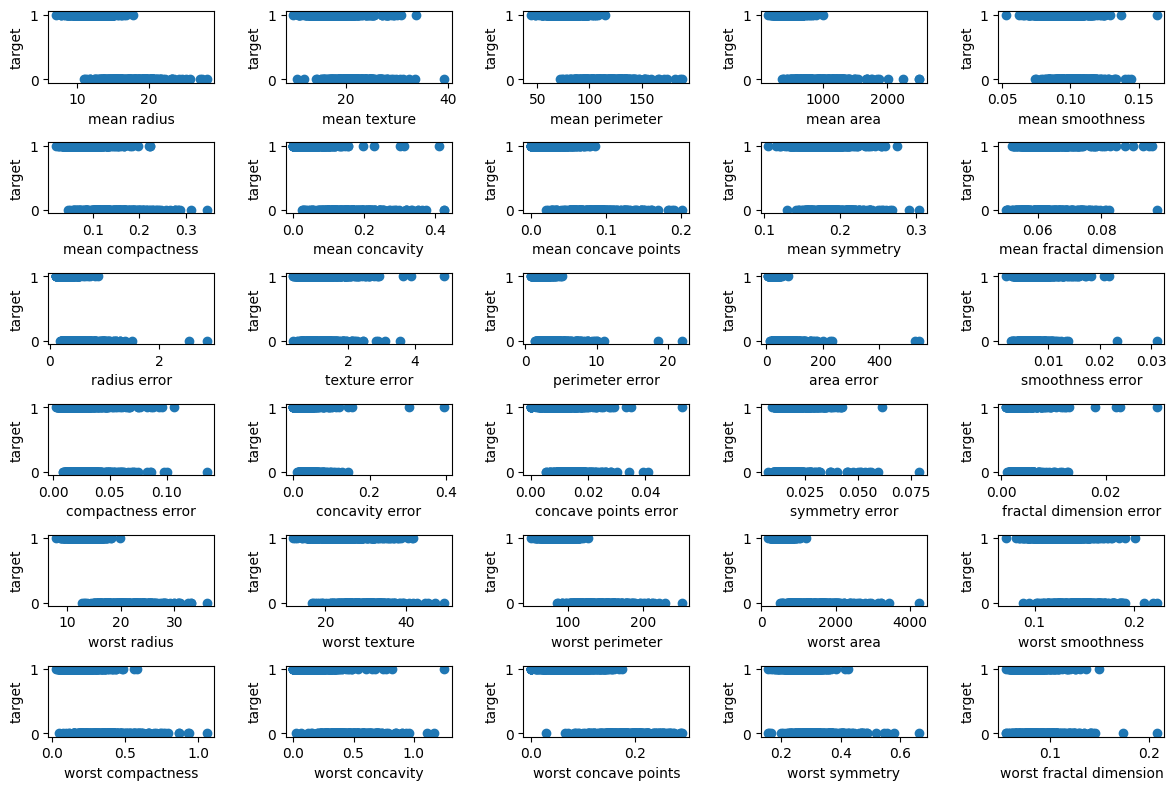

In [9]:
#visualize
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6,5,figsize = (12,8))
for i in range(6):
  for j in range(5):
    c= (i * 5)+j
    column = df.columns[c]
    ax[i,j].scatter(df[column],df['target'])
    ax[i,j].set_xlabel(column)
    ax[i,j].set_ylabel('target')

plt.tight_layout()
plt.show()

In [16]:
# train 80 % test 20 %
# create  dataset from dataframe
X = df.loc[:, 'mean radius':'worst fractal dimension']
y = df.loc[:, 'target']
print('\n(X_data, y_data):\n', X , '\n',y)
# train 80 test 20
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2,random_state=1234)
print('\n(X_train, y_train):\n', X_train , '\n',y_train)
print('\n(X_test, y_test):\n', X_test , '\n',y_test)


(X_data, y_data):
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean

[1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 0 0 0]
0.9473684210526315
0.9577464788732394


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


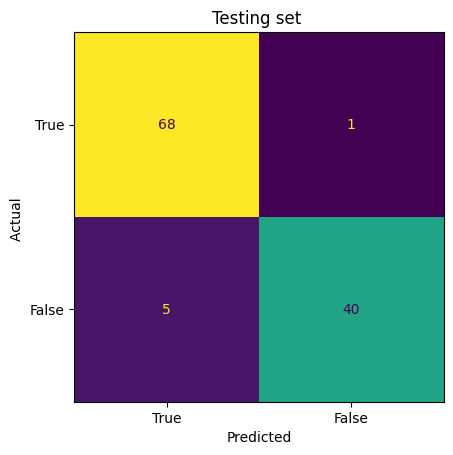

In [46]:
#Logistic
#trainning
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
print(y_test_hat)
print(metrics.accuracy_score (y_test, y_test_hat))
F1_Logistic = metrics.f1_score(y_test, y_test_hat)
print(F1_Logistic)
# visualization of confusion matrix
import matplotlib.pyplot as plt
metrics. ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels=[True, False], colorbar=
False)
plt.xlabel('Predicted')
plt.ylabel ('Actual ')
plt.title('Testing set ')
plt.show()

[1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0]
0.956140350877193
0.965034965034965


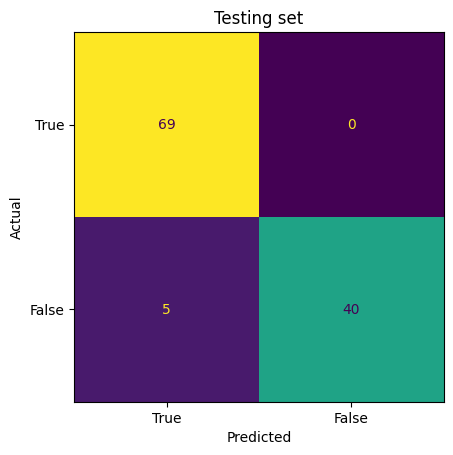

In [19]:
#Vector
# training
from sklearn import svm
model = svm.SVC(kernel='linear', C=100)
model.fit (X_train, y_train)
#Evaluation
from sklearn import metrics
y_test_hat = model.predict (X_test)
print (y_test_hat)
print(metrics.accuracy_score (y_test, y_test_hat))
F1_Vector = metrics.f1_score (y_test, y_test_hat)
print(F1_Vector)
# visualization of confusion matrix
import matplotlib. pyplot as plt
metrics. ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels=[True, False], colorbar=
False)
plt. xlabel ('Predicted')
plt. ylabel('Actual')
plt.title('Testing set')
plt.show()

0.9571428571428572


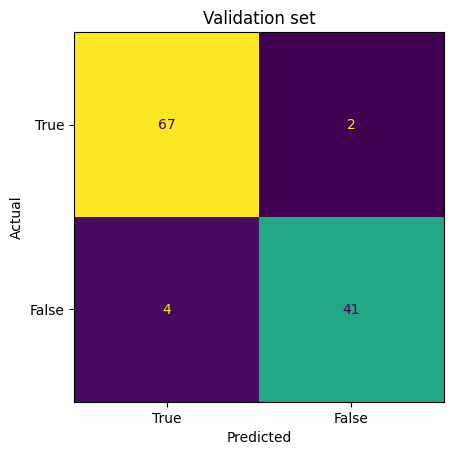

In [23]:
#K nearest
#Training
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=3, p=2)
model.fit(X_train, y_train)

#Evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
# model.kneighbors(X_test)
# print(y_test_hat)
# print(metrics.accuracy_score(y_test, y_test_hat))
knn = metrics.f1_score(y_test, y_test_hat)
print(knn)
# print(model.kneighbors(X_test))
#Visualization of confusion matrix
import matplotlib.pyplot as plt
ax = plt.subplot()
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels= [True, False], colorbar = False, ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Validation set')
plt.show()

0.9241379310344827


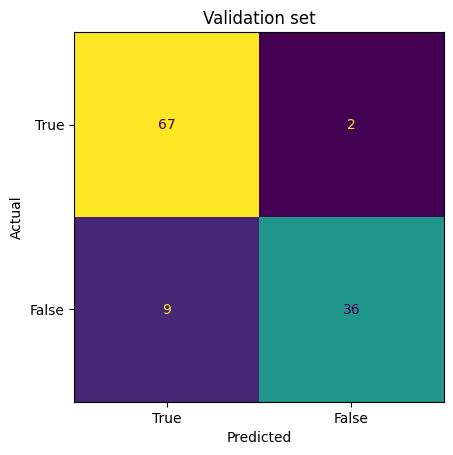

In [31]:
# Gaussian training
from sklearn import naive_bayes
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
F1_Gaussian = metrics.f1_score(y_test, y_test_hat)
print(F1_Gaussian)
# visualization
import matplotlib.pyplot as plt
ax = plt.subplot()
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels= [True, False], colorbar = False, ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Validation set')
plt.show()

0.9219858156028369


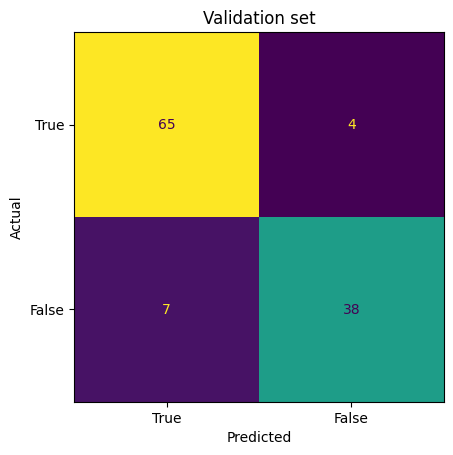

In [37]:
# Decision tree training
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
# print(metrics.accuracy_score(y_test, y_test_hat))
F1_Tree = metrics.f1_score(y_test, y_test_hat)
print(F1_Tree)
# visualization
import matplotlib.pyplot as plt
ax = plt.subplot()
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels= [True, False], colorbar = False, ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Validation set')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.9210526315789473
0.36770284095380495


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


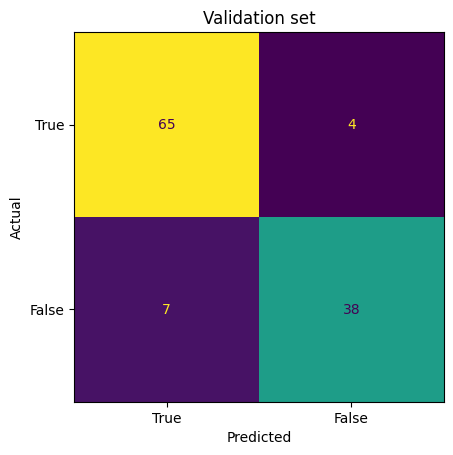

In [45]:
# convert
from keras import utils
Y_train = utils.to_categorical(y_train, 5)
Y_test = utils.to_categorical(y_test, 5)
# training epchos =1000
from keras import models ,layers, losses, optimizers
model = models.Sequential([
        layers.Dense(units=10, activation='relu', name='hidden'),
        layers.Dense(units=5, activation='softmax', name='output')
])
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.01),
)
model.fit(X_train, Y_train, epochs=1000, verbose=0)
# evaluation
from sklearn import metrics
Y_test_hat = (model.predict(X_test) >= 0.5).astype(int)
print(metrics.accuracy_score(Y_test, Y_test_hat))
print(metrics.f1_score(Y_test, Y_test_hat, average='macro'))
# visualization
import matplotlib.pyplot as plt
ax = plt.subplot()
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels= [True, False], colorbar = False, ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Validation set')
plt.show()